In [1]:
# Import libraries and intall the requirements

!pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [2]:
# Data read

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data check

In [3]:
# Check if any of the columns have null values

print(train.isnull().sum())

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


In [4]:
# Check if any of the columns have null values

print(test.isnull().sum())

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


# Data visualization

In [5]:
# Train summary

df_summary = train.describe()
train.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,0.293194,61.005236,0.434555,532.748691,0.424084,38.382199,0.340314,260509.792932,1.407120,136.455497,0.633508,0.308901,130.973822
std,0.456423,12.254107,0.497001,832.161364,0.495502,11.348800,0.475060,94829.056915,1.030414,4.573017,0.483112,0.463254,80.230552
min,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,0.000000,50.500000,0.000000,110.500000,0.000000,30.000000,0.000000,211500.000000,0.900000,134.000000,0.000000,0.000000,67.000000
50%,0.000000,60.000000,0.000000,235.000000,0.000000,38.000000,0.000000,255000.000000,1.100000,137.000000,1.000000,0.000000,118.000000
75%,1.000000,69.500000,1.000000,582.000000,1.000000,42.500000,1.000000,298500.000000,1.400000,140.000000,1.000000,1.000000,206.000000
max,1.000000,95.000000,1.000000,5882.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.000000


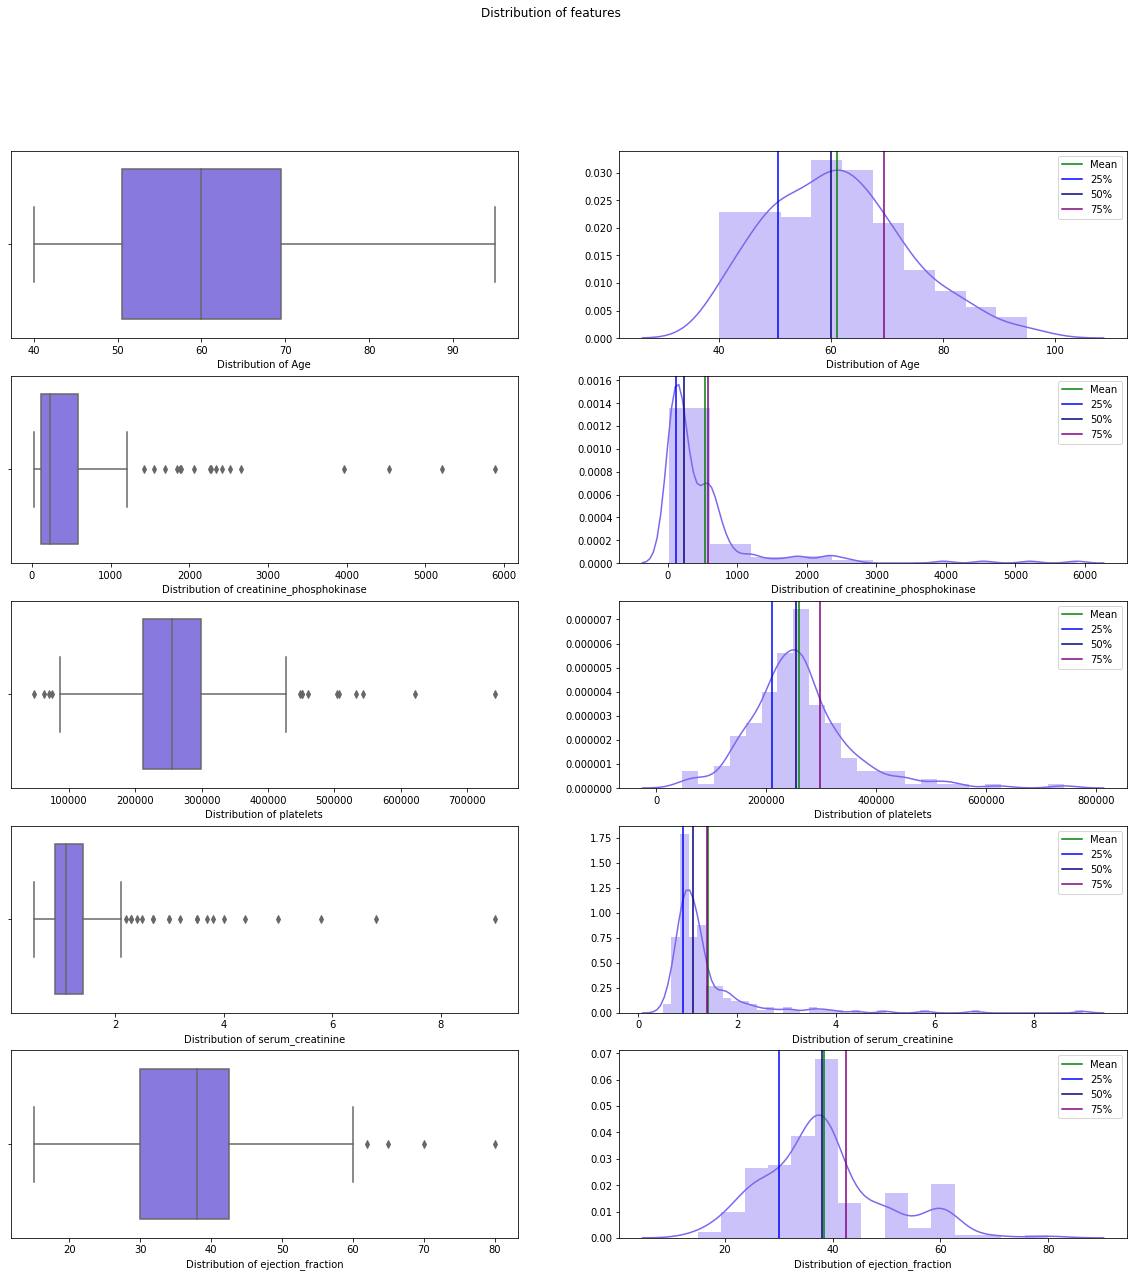

In [6]:
# Data graph

def draw_axvlines(plt, col):
    mean = df_summary.loc["mean", col]
    q1 = df_summary.loc["25%", col]
    q2 = df_summary.loc["50%", col]
    q3 = df_summary.loc["75%", col]
    plt.axvline(mean, color = "g");              
    plt.axvline(q1, color = "b");                
    plt.axvline(q2, color = "navy");              
    plt.axvline(q3, color = "purple");           
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(5, 2, figsize = (20,20));
fig.suptitle('Distribution of features');


# Distribution of Age
sns.boxplot(train["age"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(train["age"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "age");


# Distribution of creatinine_phosphokinase
sns.boxplot(train["creatinine_phosphokinase"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of creatinine_phosphokinase');

pp = sns.distplot(train["creatinine_phosphokinase"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of creatinine_phosphokinase');
draw_axvlines(pp, "creatinine_phosphokinase")


# Distribution of platelets
sns.boxplot(train["platelets"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of platelets');

pp = sns.distplot(train["platelets"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of platelets');
draw_axvlines(pp, "platelets")


# Distribution of serum_creatinine
sns.boxplot(train["serum_creatinine"], ax = axes[3][0], color = "mediumslateblue");
axes[3][0].set(xlabel = 'Distribution of serum_creatinine');

pp = sns.distplot(train["serum_creatinine"], ax = axes[3][1], color = "mediumslateblue");
axes[3][1].set(xlabel = 'Distribution of serum_creatinine');
draw_axvlines(pp, "serum_creatinine")

# Distribution of ejection_fraction
sns.boxplot(train["ejection_fraction"], ax = axes[4][0], color = "mediumslateblue");
axes[4][0].set(xlabel = 'Distribution of ejection_fraction');

pp = sns.distplot(train["ejection_fraction"], ax = axes[4][1], color = "mediumslateblue");
axes[4][1].set(xlabel = 'Distribution of ejection_fraction');
draw_axvlines(pp, "ejection_fraction")

# Modeling

In [7]:
# Split in dipendent and indipendent variables

X_train = train.drop(['DEATH_EVENT'], axis=1)
y_train = train['DEATH_EVENT']
X_test = test.drop(['DEATH_EVENT'], axis=1)
y_test = test['DEATH_EVENT']

# Random Forest

L'algoritmo Random Forest sfrutta il "bagging" come metodo principale di ensamble, che rappresenta una tecnica semplice, ma potente, per combinare più previsioni di algoritmi di apprendimento automatico cosí da avere risultati più accurati rispetto al modello preso singolarmente. Come modello individuale il RF si avvale dell'albero decisionale e in effetti una "random forest" combina più alberi decisionali in un unico modello, cosí da avere delle previsioni che in media si avvicinano più al risultato. Il risultato finale restituito da questo algoritmo varia in base al suo utilizzo: se si tratta di un problema di regressione, il risultato è la media del risultato numerico restituito dai diversi alberi, se invece si tratta di un problema di classificazione, sarà la classe restituita dal maggior numero di alberi.
Intuitivamente il RF non è altro che un approccio molto adottato nella vita reale, cioè il far affidamento su più fonti diverse, una foresta (molte fonti) è meglio di un singolo albero (singola fonte).

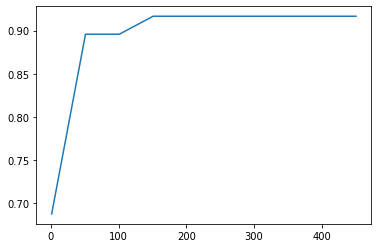

In [8]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(1,500,50):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,500,50)), list1)
plt.show()

Using Random Forest we have an accuracy of 91.66666666666667 %


<Figure size 432x288 with 0 Axes>

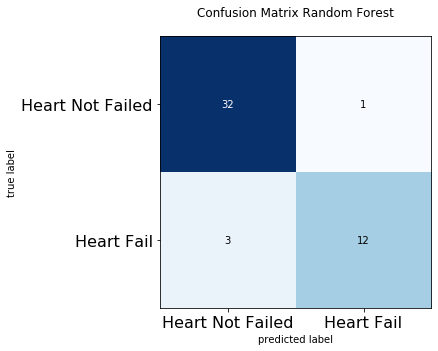

In [9]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

model = RandomForestClassifier(criterion ='entropy',n_estimators=200, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Using Random Forest we have an accuracy of', np.mean((y_pred==y_test)*100) ,'%')

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Random Forest")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Extra

Calcolando l'importanza delle features nel determinare l´accuracy per questo classificatore, é possibile rimuovere quelle meno significative. Non sempre tale metodo funziona (nel mio caso addirittura peggiorava), ma per alcune combinazioni di dataset, potrebbe essere la scelta corretta.

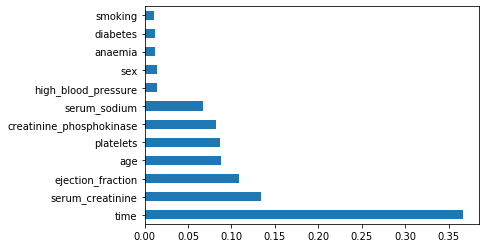

In [10]:
# Importance features graph
(pd.Series(model.feature_importances_, index=X_train.columns).nlargest(12).plot(kind='barh'))

In [11]:
X_train = X_train.drop(['smoking','high_blood_pressure','sex', 'anaemia','diabetes'], axis=1)
X_test = X_test.drop(['smoking','high_blood_pressure','sex', 'anaemia','diabetes'], axis=1)

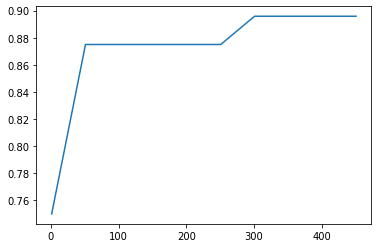

In [12]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(1,500,50):
    classifier = RandomForestClassifier(criterion='entropy', n_estimators = estimators, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,500,50)), list1)
plt.show()

Using Random Forest we have an accuracy of 87.5 %


<Figure size 432x288 with 0 Axes>

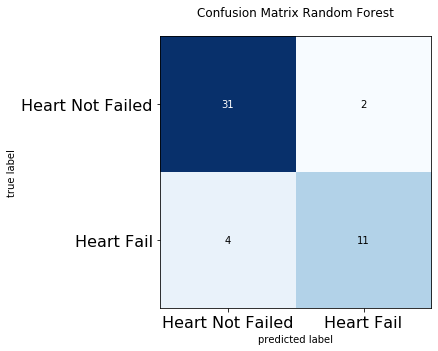

In [13]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# n_estimators = number of trees
# max_depth = maximum depth of the tree
model = RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Using Random Forest we have an accuracy of', np.mean((y_pred==y_test)*100) ,'%')

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(8,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Random Forest")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()